Здравствуйте! В данной лабораторной работе Вы познакомитесь с FFT ([Fast Fourier transform](https://en.wikipedia.org/wiki/Fast_Fourier_transform)), оно же БПФ ([Быстрое преобразование Фурье](https://ru.wikipedia.org/wiki/Быстрое_преобразование_Фурье)).

FFT/БПФ - это быстрый алгоритм вычисления DFT ([Discrete Fourier transform](https://en.wikipedia.org/wiki/Discrete_Fourier_transform)), оно же ДПФ ([Дискретное преобразование Фурье](https://ru.wikipedia.org/wiki/Дискретное_преобразование_Фурье)).

DFT/ДПФ позволяет разложить дискретный сигнал на сумму синосоид (с учётом амплитуды и фазы) и постоянного смещения.

Но использовать мы будем FFT/БПФ по одной простой причине - оно быстрое. Если в лоб применять DFT/ДПФ, получается $O(N^2)$, а если использовать FFT/БПФ - $O(N \log N)$.

Для самостоятельного ознакомления рекомендуются:
* [YouTube: 3Blue1Brown - But what is the Fourier Transform? A visual introduction.](https://www.youtube.com/watch?v=spUNpyF58BY)
* [YouTube: Reducible - The Fast Fourier Transform (FFT): Most Ingenious Algorithm Ever?](https://www.youtube.com/watch?v=h7apO7q16V0)

Давайте посмотрим на FFT/БПФ на практике. Начнём со знакомых Вам импортов:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Нужно больше графиков!

In [ ]:
plt.rcParams["figure.figsize"] = [12.8, 4.8]

Начнём с простого: входные данные - одна синусоида, почти. Для удобства дальнейшего понимания будем использовать косинус, чтобы получать верную фазу. Пусть размер входного вектора будет 50, и за это время косинус делает 2 периода.

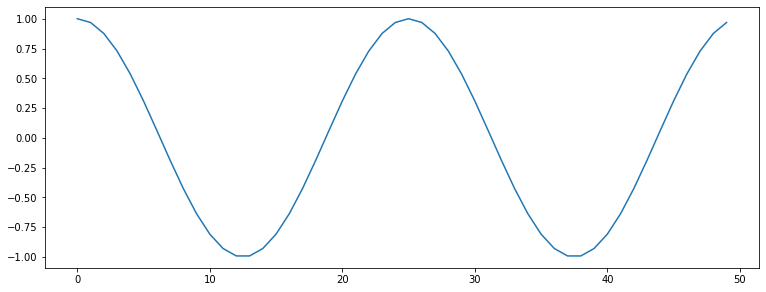

In [ ]:
fft_input = np.cos(0.08 * np.pi * np.arange(50))
plt.plot(fft_input)
plt.show()

Так как мы будем работать с действительными числами на входе, мы будем использовать функцию [numpy.fft.rfft](https://numpy.org/doc/stable/reference/generated/numpy.fft.rfft.html). На выходе мы получаем комплексные числа.

In [ ]:
fft_output = np.fft.rfft(fft_input)
print(fft_output.shape)
print(fft_output)

(26,)
[ 1.94289029e-15+0.00000000e+00j  3.36451532e-15-9.83367503e-16j
  2.50000000e+01+7.66779329e-15j -6.95852824e-16-1.34633246e-16j
 -1.12879195e-15+4.26777200e-16j -2.14932777e-15-7.70257612e-18j
 -1.01712414e-15-1.49071532e-15j  1.34412666e-15-2.23443329e-15j
  1.22358133e-15+2.08227068e-15j  8.90306619e-16+1.41006420e-15j
  1.01326108e-15+5.05958483e-16j  2.28588928e-16+2.66323660e-15j
 -2.06978730e-15-6.24773600e-16j  1.13458219e-16+4.90114218e-16j
  2.53485306e-16+9.17272323e-16j -2.70789796e-15+2.23639998e-16j
 -1.98750595e-16-1.89902768e-15j  7.32747746e-16-7.22032888e-16j
  4.48629988e-16-8.69919794e-16j  1.10080871e-15-8.44742956e-16j
 -4.18159343e-17+1.18821772e-15j  1.68921186e-15-2.46718394e-16j
 -1.09690383e-15-4.55030391e-16j  1.77635684e-15+3.25812483e-16j
  3.68865053e-16+1.58569598e-15j -3.05311332e-15+0.00000000e+00j]


Как видим, мы получили 26 чисел. Нулевое число соответствует постоянному смещению, остальные 25 чисел соответствует частотам косинусных составляющих сигнала с учётом размера входного вектора. Число $i$ соответствует частоте, при которой размер входного вектора соответствует $i$ периодам. Например, если частота дискретизации $10$ Гц, то для $i = 12$ получается частота $2.4$ Гц.

Также с определеним частот может помочь функция [numpy.fft.rfftfreq](https://numpy.org/doc/stable/reference/generated/numpy.fft.rfftfreq.html):

In [ ]:
freqs = np.fft.rfftfreq(fft_input.size, d=1/10)
print(freqs)
print(freqs[12])

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4.  4.2 4.4 4.6 4.8 5. ]
2.4000000000000004


Надеюсь, с индексами всё понятно. Но что означают эти числа? Посмотрим графики их действительных и мнимых частей.

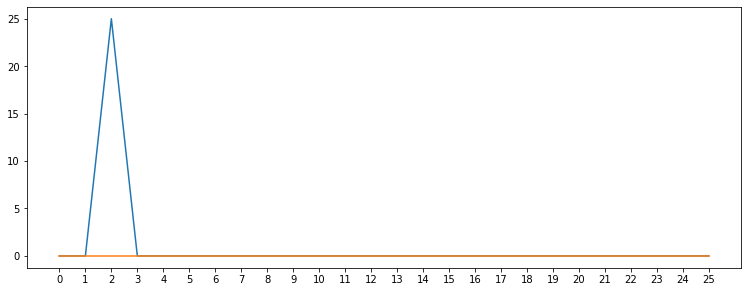

In [ ]:
plt.xticks(np.arange(26))
plt.plot(np.real(fft_output))
plt.plot(np.imag(fft_output))
plt.show()

Давайте попробуем сдвинуть косинус по фазе на $\pi / 4$ и посмотреть, что изменится:

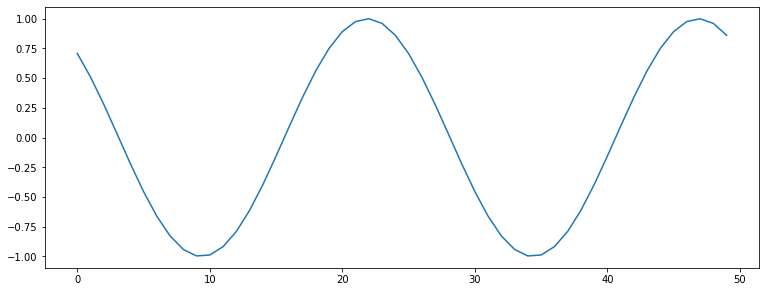

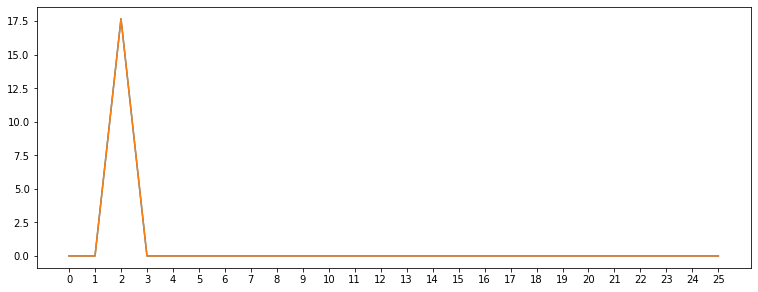

In [ ]:
fft_input = np.cos(0.25 * np.pi + 0.08 * np.pi * np.arange(50))
plt.plot(fft_input)
plt.show()
fft_output = np.fft.rfft(fft_input)
plt.xticks(np.arange(26))
plt.plot(np.real(fft_output))
plt.plot(np.imag(fft_output))
plt.show()

Соответственно, по отдельности действительные и мнимые части интереса не представляют. Давайте рассмотрим модули комплексных чисел:

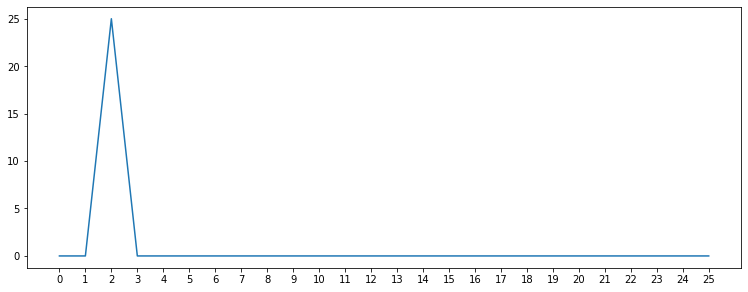

In [ ]:
plt.xticks(np.arange(26))
plt.plot(np.abs(fft_output))
plt.show()

Модули комплексных чисел пропорциональны амплитудам косинусных составляющих входного сигнала. Чтобы получить амплитуды, нужно модули умножить на $2 / N$, где $N$ - размер входного вектора. Но при этом чтобы получить постоянное смещение, нужно модуль нулевого числа разделить на $N$.

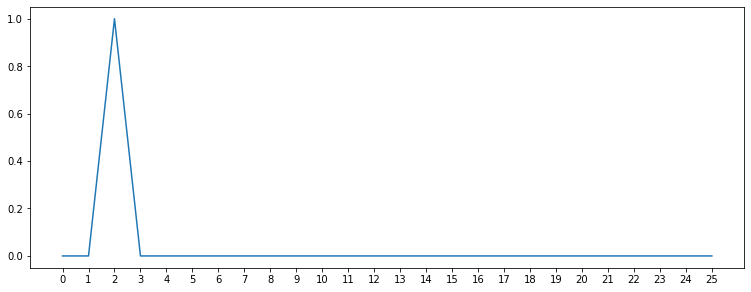

In [ ]:
plt.xticks(np.arange(26))
plt.plot(np.abs(fft_output) * 2 / fft_input.size)
plt.show()

Теперь рассмотрим углы комплексных чисел - это фазы косинусных составляющих сигнала.

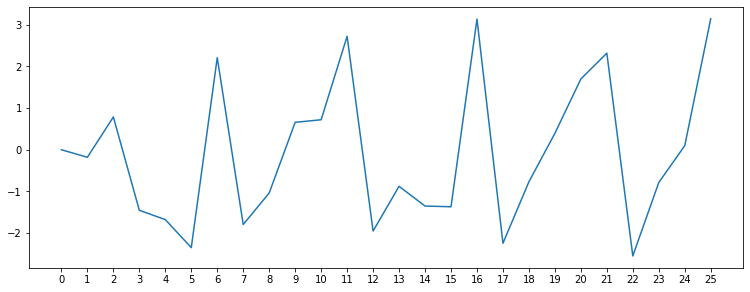

In [ ]:
plt.xticks(np.arange(26))
plt.plot(np.angle(fft_output))
plt.show()

Как можно заметить, график немного странный. Дело в том, что для около-нулевых комплексных чисел не получится нормально определить угол, поэтому нам эти углы не представляют интереса. Давайте посмотрим значение [2].

In [ ]:
np.angle(fft_output[2])

0.7853981633974486

Убедимся, что это действительно $\pi / 4$

In [ ]:
np.pi / 4

0.7853981633974483

Теперь давайте возьмём пример по-сложнее и посмотрим, как это работает.

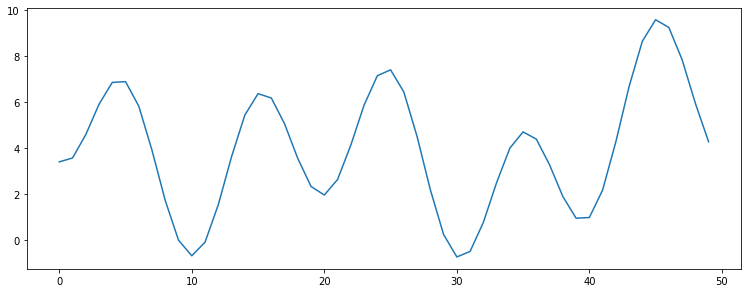

In [ ]:
fft_input = 4 # постоянное смещение
fft_input += 1 * np.cos(0.04 * np.pi * np.arange(50)) # 1 период без сдвига и амплитудой 1
fft_input += 2 * np.cos(0.25 * np.pi + 0.08 * np.pi * np.arange(50)) # 2 периода со сдвигом pi/4 и амплитудой 2
fft_input += 3 * np.cos(np.pi + 0.2 * np.pi * np.arange(50)) # 5 периодов с сдвигом pi и амплитудой 3
plt.plot(fft_input)
plt.show()

Посмотрим на результат работы FFT

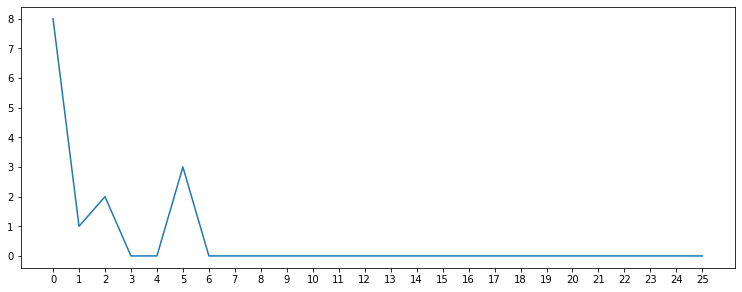

In [ ]:
fft_output = np.fft.rfft(fft_input)
plt.xticks(np.arange(26))
plt.plot(np.abs(fft_output) * 2 / fft_input.size)
plt.show()

Как можно заметить, амплитуды косинусных составлящих верные, а постоянное смещение ещё нужно поделить на 2, как это уже было описано выше. Посмотрим на фазы:

In [ ]:
print(np.angle(fft_output[1]), 0)
print(np.angle(fft_output[2]), np.pi / 4)
print(np.angle(fft_output[5]), np.pi)

1.0214051826551437e-16 0
0.7853981633974485 0.7853981633974483
3.1415926535897927 3.141592653589793


Всё совпадает с достаточной точностью.

Теперь рассмотрим обратное преобразование. Сначала модифицируем полученное разложение на частоты:

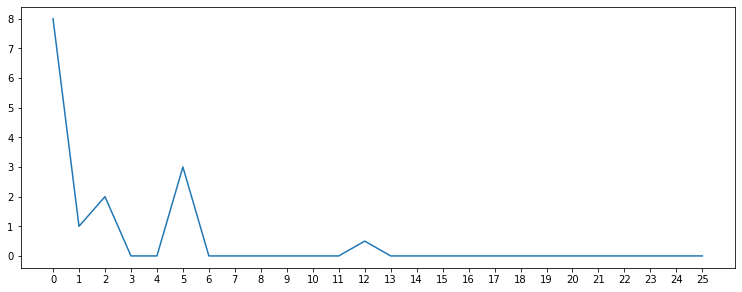

In [ ]:
new_r = 0.5 * fft_input.size / 2 # амплитуда 0.5
new_a = np.pi / 2 # сдвиг по фазе pi / 2
fft_output[12] = np.complex(new_r * np.cos(new_a), new_r * np.sin(new_a)) # добавим косинус на 12 периодов
plt.xticks(np.arange(26))
plt.plot(np.abs(fft_output) * 2 / fft_input.size)
plt.show()

Для обратного преобразования будем использовать функцию [numpy.fft.irfft](https://numpy.org/doc/stable/reference/generated/numpy.fft.irfft.html):

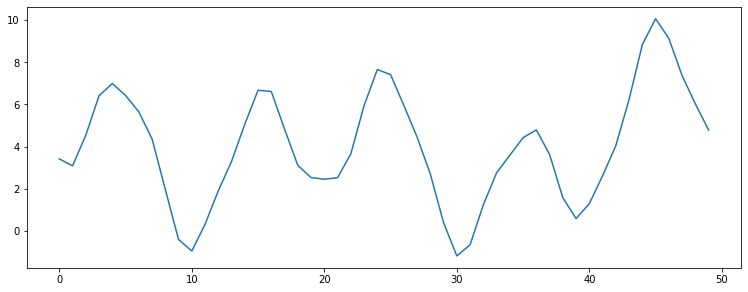

In [ ]:
ifft_output = np.fft.irfft(fft_output, fft_input.size)
plt.plot(ifft_output)
plt.show()

Видно, что что-то изменилось, но что явно - не видно. Давайте найдём разницу между получившимся вектором и изначальным:

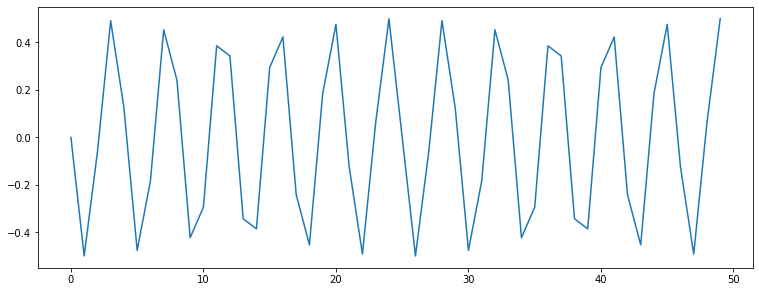

In [ ]:
plt.plot(ifft_output - fft_input)
plt.show()

Собственно, вот и наш косинус. Он получился такой из-за относительно низкой частоты дискретизации.

Теперь перейдём к заданию. У Вас есть некоторый датчик, который проводит какие-то измерения с частотой 500 Гц. Вы получили результаты измерений за 2 секунды, но на них значительно повлияли помехи от сети 50 Гц. Устраните помехи.

Пример данных:

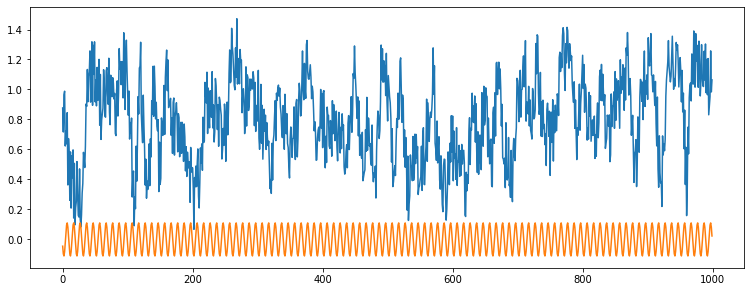

In [ ]:
rng = np.random.default_rng(seed=0)
data = np.interp(np.arange(1000), np.arange(100) * 10, rng.random(100)) + rng.random(1000) * 0.5
interference_a = 0.1 + 0.1 * rng.random()
interference_p = 2 * np.pi * rng.random()
interference = interference_a * np.sin(interference_p + 0.2 * np.pi * np.arange(1000))
measurements = data + interference
# plt.plot(measurements)
plt.plot(data)
plt.plot(interference)
plt.show()

Реализуйте функцию удаления помех:

In [ ]:
def remove_interference(measurements):
  # N = f*2 = 50*2
  fft_output = np.fft.rfft(measurements)
  # print(fft_output)
  # fft_output = np.fft.fftshift(fft_output)
  fft_output[100] = 0
  # result = np.real(fft_output)
  result = np.fft.irfft(fft_output)
  print(np.size(measurements), np.size(fft_output), np.size(result))
  return result

Протестируйте её локально:

1000 501 1000


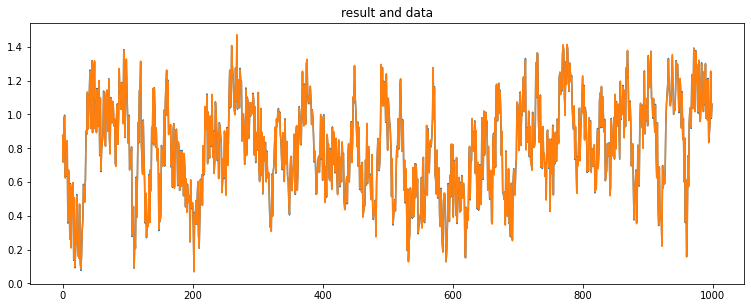

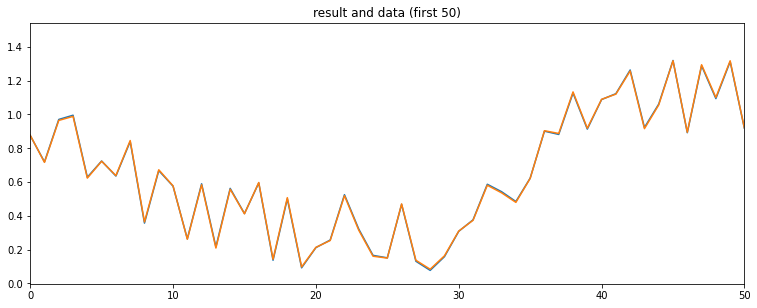

Difference: 0.004838062513171227


In [ ]:
result = remove_interference(measurements)
plt.title("result and data")
plt.plot(result)
plt.plot(data)
plt.show()
plt.plot()
plt.title("result and data (first 50)")
plt.plot(result)
plt.plot(data)
plt.xlim(0, 50)
plt.show()
print("Difference:", np.sqrt(np.mean((result - data) ** 2)))

Если Вам удалось добиться метрики Difference менее 0.005, то всё хорошо, можете переходить к автоматической проверке. Для этого сначала выполните этот код:




In [2]:
import urllib.request
from json import dumps, loads

server = "https://eztester.agridnev.com"
task_id = 10

def auto_test(func):
  response = urllib.request.urlopen(server + "/task/" + str(task_id) + "?secret=" + secret)
  token = response.read().decode("utf-8")
  results = []
  for case in range(20):
    response = urllib.request.urlopen(server + "/data/measurements?case=" + str(case) + "&token=" + token)
    measurements = np.array(loads(response.read().decode("utf-8")), dtype=float)
    filtered = func(measurements)
    plt.plot(filtered)
    plt.plot(measurements)
    plt.show()
    results.append(filtered.tolist())
  req = urllib.request.Request(server + "/solution?token=" + token)
  req.add_header("Content-Type", "application/json")
  data = dumps(results).encode('utf-8')
  req.add_header('Content-Length', len(data))
  response = urllib.request.urlopen(req, data)
  print("Passed! First time passed:", response.read().decode("utf-8"))

def print_info():
  response = urllib.request.urlopen(server + "/user?secret=" + secret)
  info = loads(response.read().decode("utf-8"))
  print("Full name:", info["name"])
  print("Group:", info["group"])
  print("Tasks: (id --- name --- solution)")
  for id in info["tasks"]:
    task = info["tasks"][id]
    print(id, "---", task["name"], "---", task["solution"])

Как и раньше, сюда вставьте свой секрет

In [4]:
secret = "faaf64fa1f4b461fa2d627ffaec3ce4a"

И выполните автоматическую проверку

1000 501 1000


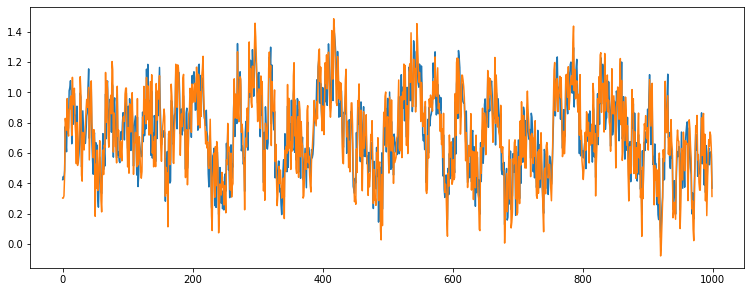

1000 501 1000


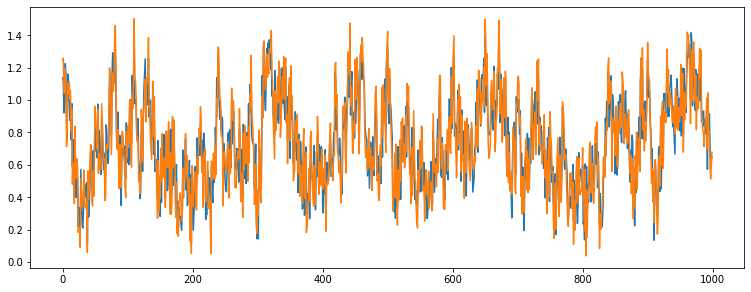

1000 501 1000


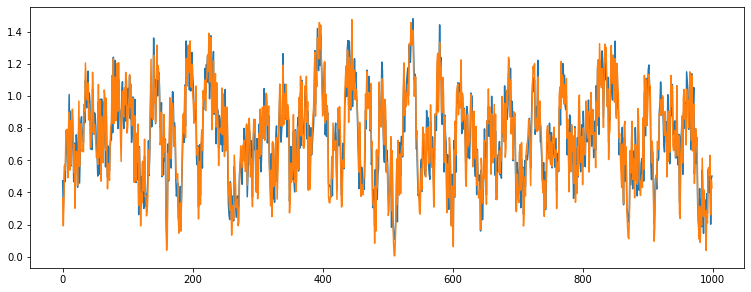

1000 501 1000


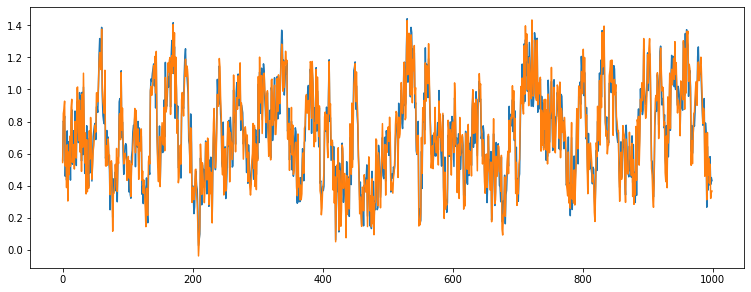

1000 501 1000


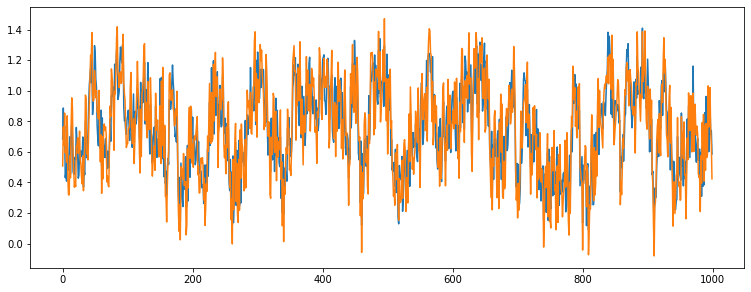

1000 501 1000


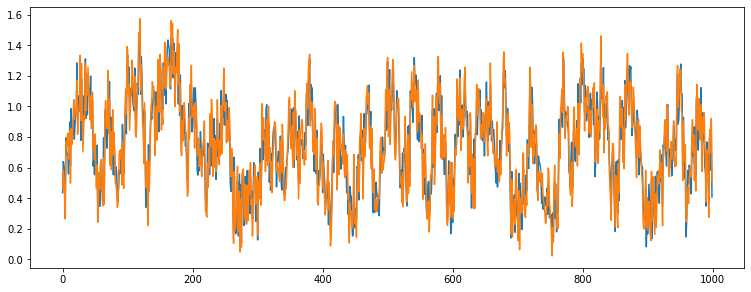

1000 501 1000


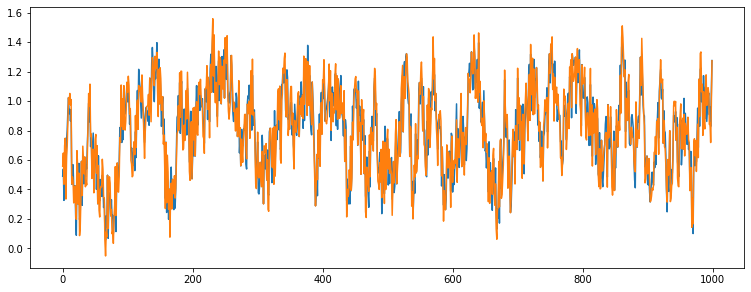

1000 501 1000


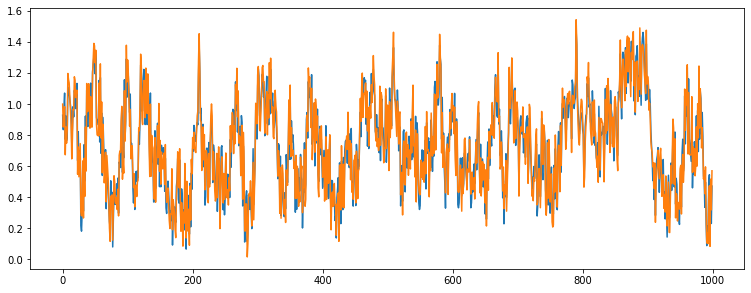

1000 501 1000


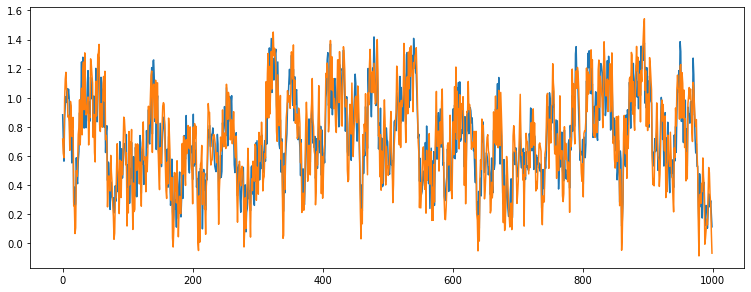

1000 501 1000


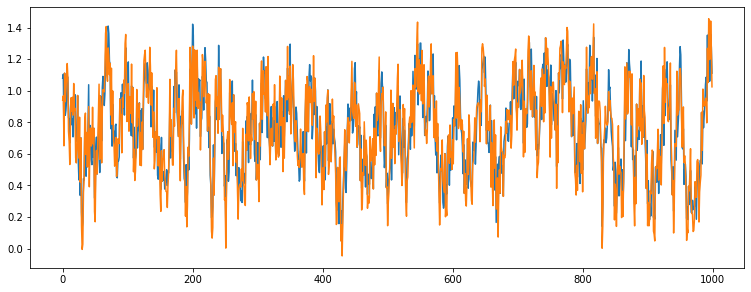

1000 501 1000


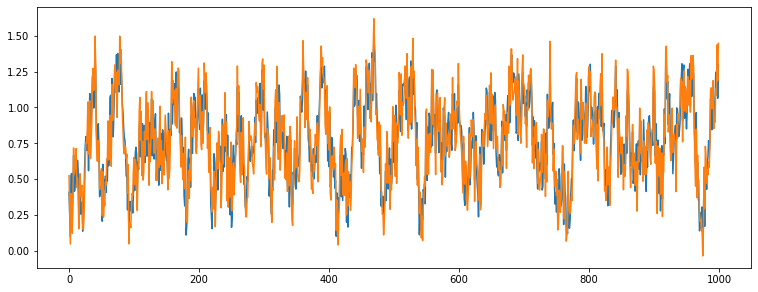

1000 501 1000


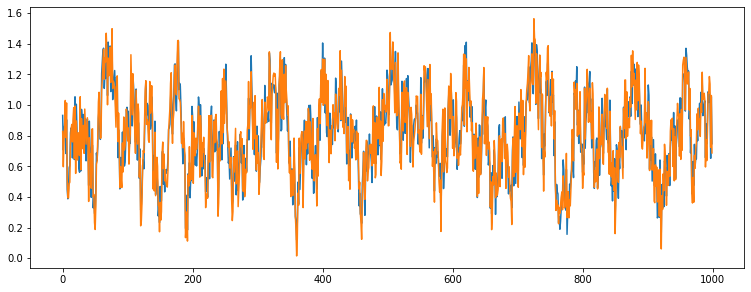

1000 501 1000


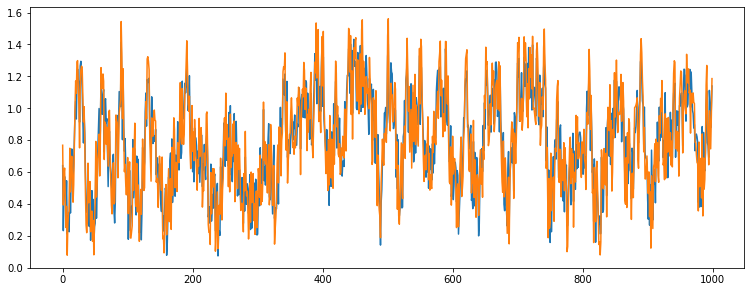

1000 501 1000


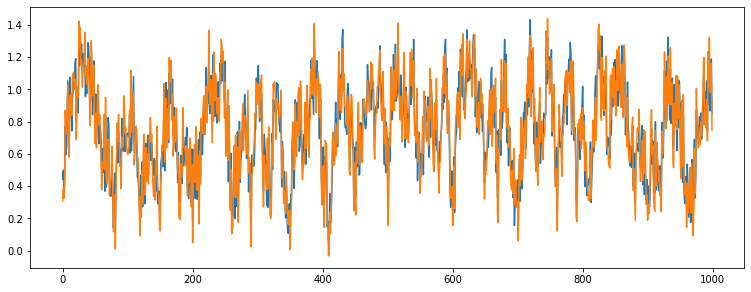

1000 501 1000


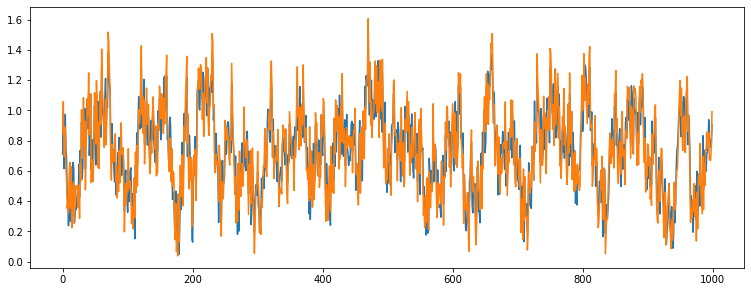

1000 501 1000


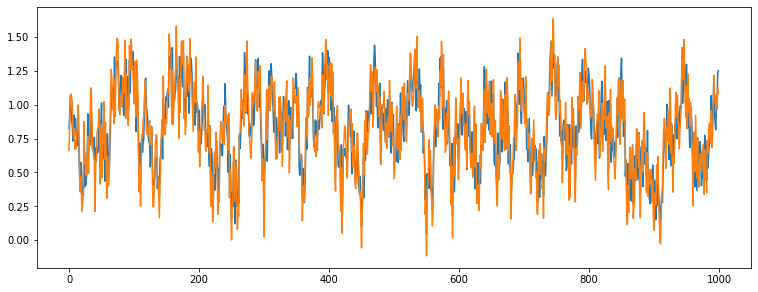

1000 501 1000


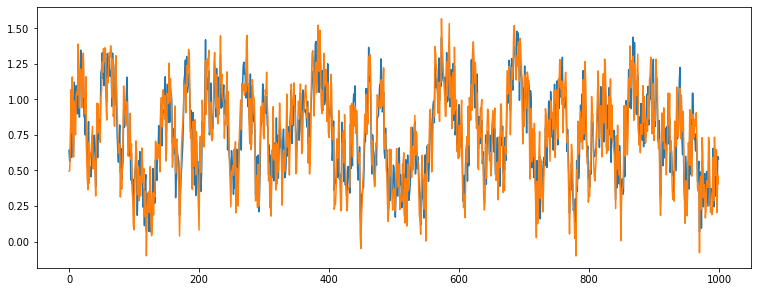

1000 501 1000


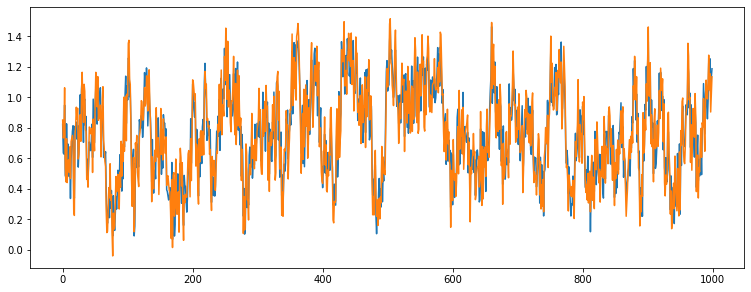

1000 501 1000


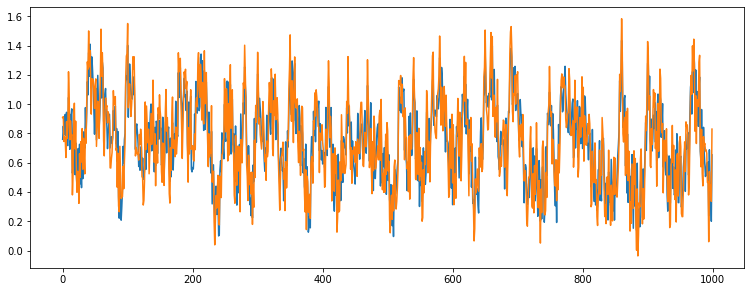

1000 501 1000


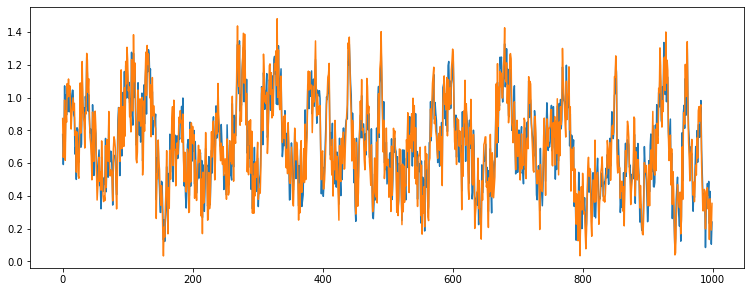

Passed! First time passed: "2021-09-30T11:28:37.456427"


In [ ]:
auto_test(remove_interference)

Надеюсь, у Вас всё получилось.

Можете проверить, что у Вас всё засчитано.

In [5]:
print_info()

Full name: Базин Антон Владимирович
Group: Б18-503
Tasks: (id --- name --- solution)
1 --- 0a - Hello world --- 2021-09-03T13:30:08.095889
2 --- 0b - Hello NumPy --- 2021-09-09T10:47:28.096867
3 --- 0c - Hello OpenCV --- 2021-09-09T11:06:22.783564
4 --- 1a - Basic Filters --- 2021-09-24T11:29:11.231459
7 --- 2a - PID --- 2021-09-27T19:22:25.281888
8 --- 2b - PID + BB --- 2021-09-27T19:25:56.709593
10 --- 3a - FFT --- 2021-09-30T11:28:37.456427
11 --- 3b - FFT + Audio --- None
